---
title: "Monte-Carlo Methods: PRNGs"
date: "08/11/2024"
author: Rafiq Islam
categories: [Data Science, Computational Mathematics, Number Theory]
citation: true
search: true
aliases: 
  - "https://mrislambd.github.io/posts/montecarlo1/"
lightbox: true
image: mc1.png
listing: 
    contents: "/../../posts"
    max-items: 3
    type: grid
    categories: false
    date-format: full
    fields: [image, date, title, author, reading-time]  
---  

## Introduction 

<p style="text-align:justify">The Monte Carlo method is a widely used statistical technique that leverages the power of randomness to solve complex mathematical problems and simulate the behavior of various systems. It’s a method that has found applications across diverse fields, including physics, finance, engineering, and biology. In this blog post, we’ll dive deeper into the Monte Carlo method and explore the mathematics behind it, along with a discussion of random number generators like Linear Congruential Generators (LCGs) and the infamous RANDU.
</p>


### The Monte Carlo Method

<p style="text-align:justify">
    The Monte Carlo method is based on the idea of using randomness to approximate solutions to problems that may be deterministic in nature but are too complex for analytical methods. The name "Monte Carlo" is a nod to the randomness associated with the famous casino in Monaco.<br>
    <br>
    The basic principle behind the Monte Carlo method is to simulate the behavior of a system by generating random samples and using them to estimate the desired quantities. Let’s consider a mathematical problem where we need to compute an integral that does not have a straightforward analytical solution:
</p>

\begin{align*}
I &= \int_{a}^{b} f(x) \, dx
\end{align*}

<p style="text-align:justify">
    The Monte Carlo method approximates this integral by sampling random points $x_i$ uniformly from the interval $[a, b]$ and evaluating the function $f(x)$ at these points. The integral can then be approximated as:
</p>


\begin{align*}
I \approx \frac{b - a}{N} \sum_{i=1}^{N} f(x_i)
\end{align*}

<p style="text-align:justify">
    where $N$ is the number of random samples. As $N$ increases, the approximation becomes more accurate, thanks to the Law of Large Numbers.<br>
    <br>
    This approach is particularly useful for high-dimensional integrals, where traditional numerical integration methods become computationally expensive or infeasible.
</p>

### Random Number Generators (RNGs)

<p style="text-align:justify">
    At the heart of the Monte Carlo method lies the generation of random numbers. In practice, most simulations do not use true random numbers but rather pseudorandom numbers generated by deterministic algorithms. These pseudorandom number generators (PRNGs) produce sequences that mimic the properties of true randomness.
</p>

#### Linear Congruential Generator (LCG)

One of the most commonly used PRNGs is the **Linear Congruential Generator (LCG)**. The LCG generates a sequence of numbers $X_1, X_2, X_3, \ldots$ using the recursive relation:

\begin{align*}
X_{n+1} &= (aX_n + c) \mod m
\end{align*}  

where:  

- $X_n$ is the $n$-th number in the sequence.
- $a$ is the multiplier.
- $c$ is the increment.
- $m$ is the modulus.

<p style="text-align:justify">
    The sequence starts with an initial value $X_0$, known as the seed, and the parameters $a$, $c$, and $m$ are carefully chosen to maximize the period and quality of the generated sequence.<br>
    <br>
    The quality of the LCG depends on the choice of these parameters. For instance, to achieve a full period (i.e., the sequence cycles through all possible values before repeating), the following conditions must be met:
</p>
1. $c$ and $m$ must be relatively prime.
2. $a - 1$ must be divisible by all prime factors of $m$.
3. If $m$ is divisible by 4, then $a - 1$ must also be divisible by 4.

A well-known example of an LCG is the `minstd_rand` generator used in the C++ Standard Library, which uses $a = 16807$, $c = 0$, and $m = 2^{31} - 1$.

#### The RANDU Generator

**RANDU** is an example of a poorly designed LCG that became notorious for its flaws. It is defined by the recurrence relation:

\begin{align*}
X_{n+1} &= (65539X_n) \mod 2^{31}
\end{align*}

<p style="text-align:justify">
    Although RANDU was widely used in the 1960s and 1970s due to its simplicity, it was later discovered to produce sequences with significant correlations. For example, points generated using RANDU tend to lie on a small number of planes in three-dimensional space, which can severely impact the accuracy of Monte Carlo simulations.<br>
    <br>
    The generator's flaws arise from poor parameter selection. In RANDU, the modulus $m = 2^{31}$ and the multiplier $a = 65539$ result in a sequence with poor distribution properties. As a consequence, RANDU’s generated numbers do not pass modern statistical tests for randomness, rendering it unsuitable for serious applications.<br>
    <br>
    Let's solve some math problems and visualize randomness.
</p>



#### Problem 1  
Given  an LCG with parameters $a,c,m$, prove that  
\begin{center}
$x_{n+k}=a^kx_n+\frac{(a^k-1)}{a-1}c (\mod m)$; $(a\ge 2, k\ge0)$
\end{center}
which shows that the $(n+k)th$ term can be computed directly from the $nth$ term.  

#### Solution:  
We know from D. H. Lehmer's linear congruential generator that  
\begin{equation}
x_n \equiv ax_{n-1}+c \mod m
\end{equation}  
where $a$ is called the multiplier, $c$ is called the shift or increment, and $m$ is called the modulus of the generator. The given equation is also an LCG. We can prove this by induction method. Since $k\ge 0$ so, let $k=0$. Then the given relation can be written as  
\begin{center}
$x_n\equiv x_n \mod m$
\end{center} 

If $k=1$. Then the given relation can be written as  
\begin{align*}
x_{n+1}& \equiv ax_n+\frac{a-1}{a-1}c \mod m\\
&\equiv ax_n+c \mod m
\end{align*}  

If $k=2$. Then the given relation can be written as  
\begin{align*}
x_{n+2}& \equiv a^2x_n+\frac{a^2-1}{a-1}c \mod m\\
&\equiv a^2x_n+(a+1)c \mod m\\
&\equiv a^2x_n+ac+c \mod m \\
&\equiv a(ax_n+c)+c \mod m\\
&\equiv ax_{n+1}+c \mod m
\end{align*}  

Now for any $k=p$ where $p\in \mathbb{N}$,
\begin{align*}
x_{n+p}& \equiv a^px_n+\frac{a^p-1}{a-1}c \mod m \\
\end{align*}

Now by the method of induction, the given equation would be a lcg if it holds for any $k=p\in \mathbb{N}$ then it must hold for $k=p+1$ where $p\in \mathbb{N}$. Now from equation (1)
\begin{align*}
x_{n+p+1} &\equiv ax_{(n+p+1)-1}+c \mod m\\
& \equiv ax_{n+p}+c \mod m \\
& \equiv a(a^px_n+\frac{a^p-1}{a-1}c) +c \mod m\\
& \equiv a^{p+1}x_n+(a\frac{a^p-1}{a-1}+1)c \mod m\\
& \equiv a^{p+1}x_n+\frac{a^{p+1}-1}{a-1}c \mod m\\
\end{align*}

Which proves that $x_{n+k}=a^kx_n+\frac{(a^k-1)}{a-1}c (\mod m)$; $(a\ge 2, k\ge0)$ is an lcg such that $(n+k)th$ term can be computed directly from the $nth$ term.  

#### Problem 2  
**(a)**  
If $U$ and $V$ are independently distributed random variables from the uniform distribution $U(0,1)$ show that $U+V (\mod 1)$ is also $U(0,1)$.  

**Solution**  

Let $Z=U+V$ where $U$ and $V$ are independently distributed random variables from the uniform distribution $U(0,1)$. So the minimum value that $Z$ can have is $0$ and the maximum value could be $2$. If $f_U(u)$ is the PDF of $U$ and $f_V(v)$ is the PDF of $V$ then the PDF of $Z$ can be found from the convolution of two distribution as follows
\begin{align*}
  f_Z(z)=\int_{-\infty}^{+\infty}f_U(u)f_V(z-u)du=\begin{cases}
          z & \text{for} \hspace{2mm} 0 < z < 1\\
          2-z & \text{for} \hspace{2mm} 1 \le z <2\\
          0 & \text{otherwise}
         \end{cases}
\end{align*}
Now for any $x\in (0,1)$ 
\begin{align*}
  \mathbb{P}(U+V (\mod 1) \le x) &= \mathbb{P}(Z \le x)+ \mathbb{P}(1\le Z \le x+1)\\
                                 &= \int_{0}^{x} z dz +\int_{1}^{1+x}(2-z)dz\\
                                 &=x
\end{align*}

which is the CDF of a random variable distributed $U(0,1)$  

**(b)**  
A random number generator is designed by  
\begin{center}
$R_n=(\frac{X_n}{8}+\frac{Y_n}{7}) \mod 1$
\end{center}
where $X_0=0, Y_0=1, X_{n+1}=(9X_n+3) \mod 8$ and $Y_{n+1}=3Y_n \mod 7$ for $n=0,1,2,\cdots$.  Calculate $R_0,R_1,R_2, \cdots , R_5.$. What is the period of the generator $\{R_n\}$?  

**Solution**   


In [1]:
#| code-fold: false
import numpy as np
import pandas as pd

def rand_gen(n):
    RN = np.zeros(n + 1)
    x = np.zeros(n + 1, dtype=int)
    y = np.zeros(n + 1, dtype=int)

    # Initial values
    x[0] = 0
    y[0] = 1
    RN[0] = (x[0] / 8 + y[0] / 7) % 1

    # Iterative process
    for i in range(n):
        x[i + 1] = (9 * x[i] + 3) % 8
        y[i + 1] = (3 * y[i]) % 7
        RN[i + 1] = (x[i + 1] / 8 + y[i + 1] / 7) % 1

    return pd.DataFrame({"X_values": x, "Y_values": y, "R_values": RN})

# Generate the first 4 values
print(rand_gen(4))

   X_values  Y_values  R_values
0         0         1  0.142857
1         3         3  0.803571
2         6         2  0.035714
3         1         6  0.982143
4         4         4  0.071429


So the unique values are

In [2]:
#| warning: false
unique_values = rand_gen(2**10)["R_values"].unique()
for i in range(len(unique_values)):
    print(i,' ',np.round(unique_values[i],4))

0   0.1429
1   0.8036
2   0.0357
3   0.9821
4   0.0714
5   0.5893
6   0.3929
7   0.0536
8   0.2857
9   0.2321
10   0.3214
11   0.8393
12   0.6429
13   0.3036
14   0.5357
15   0.4821
16   0.5714
17   0.0893
18   0.8929
19   0.5536
20   0.7857
21   0.7321
22   0.8214
23   0.3393


So from the above data we can see that the period is $24$.  

#### Problem 3  

Write a code that would implement RANDU. For debugging purpose print $x_{1000}$ when the seed is $x_0=1$  

**(a)**  
Using RANDU generate $u_1,u_2,\cdots, u_{20,002}$ where $u=\frac{x_n}{M}$. For all triplets in your sequence, $u_i, u_{i+1}, u_{i+2}$, in which $0.5\le u_{i+1} \le 0.51$ plot $u_i$ versus $u_{i+2}$. Comment on the pattern of your scatterplot.  

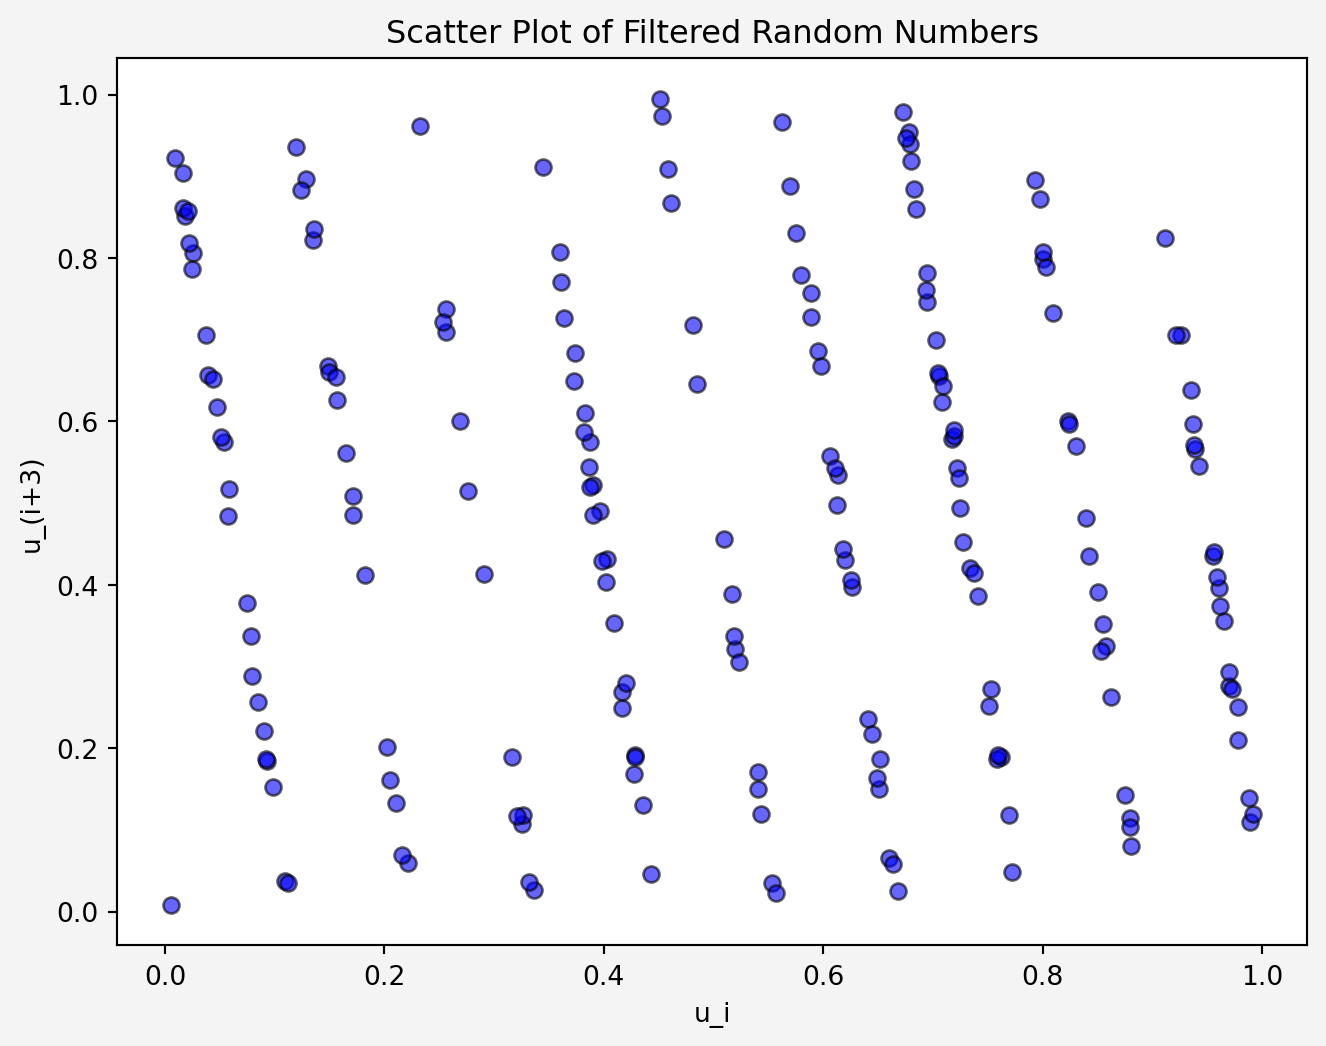

In [3]:
import matplotlib.pyplot as plt

# Set seed
seed = 1.0
N = 20002

# RANDU function
def RANDU():
    global seed
    seed = ((2**16 + 3) * seed) % (2**31)
    return round(seed / (2**31), 6)

# Generate random numbers
A = np.zeros((N, 3))

for i in range(N):
    A[i, 0] = RANDU()
    A[i, 1] = RANDU()
    A[i, 2] = RANDU()

# Convert to DataFrame
B = pd.DataFrame(A, columns=["V1", "V2", "V3"])

# Filter data where V2 is between 0.5 and 0.51
C = B[(B["V2"] >= 0.5) & (B["V2"] <= 0.51)]

# Set the background color
plt.figure(figsize=(8, 6), facecolor="#f4f4f4")

# Scatter plot
plt.scatter(C["V1"], C["V3"], color="blue", alpha=0.6, edgecolors="black")
plt.xlabel("u_i")
plt.ylabel("u_(i+3)")
plt.title("Scatter Plot of Filtered Random Numbers")

# Show plot
plt.show()

**(b)**  
Generate a sequence of lenght 1002. Use a program that plots points in 3 dimensions and rotates the axes to rotate the points until you can see the 15 planes.

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Set seed
seed = 1.0
N = 1002

# RANDU function
def RANDU():
    global seed
    seed = ((2**16 + 3) * seed) % (2**31)
    return round(seed / (2**31), 6)

# Generate random numbers
A = np.zeros((N, 3))

for i in range(N):
    A[i, 0] = RANDU()
    A[i, 1] = RANDU()
    A[i, 2] = RANDU()

# Convert to DataFrame
B = pd.DataFrame(A, columns=["V1", "V2", "V3"])

# Create 3D Scatter Plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=B["V1"], y=B["V2"], z=B["V3"],
    mode='markers',
    marker=dict(
        size=4,
        color=np.linspace(0, 1, N),
        colorscale='rainbow',
        opacity=0.8
    )
))

# Set background color
fig.update_layout(
    title="3D Random Number Visualization",
    scene=dict(
        xaxis_title="V1",
        yaxis_title="V2",
        zaxis_title="V3",
        bgcolor="#f4f4f4"
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show interactive 3D plot
fig.show()

#### Problem 4 Approximation of pi using Monte-Carlo Method  

A circle with radius $r=1$ has the area $A=\pi r^2= \pi$ and a square with length $l=1$ has the area $B=1$. Now if we consider the following situation, where a quarter of a unit circle is inscribed inside a unit square like this  


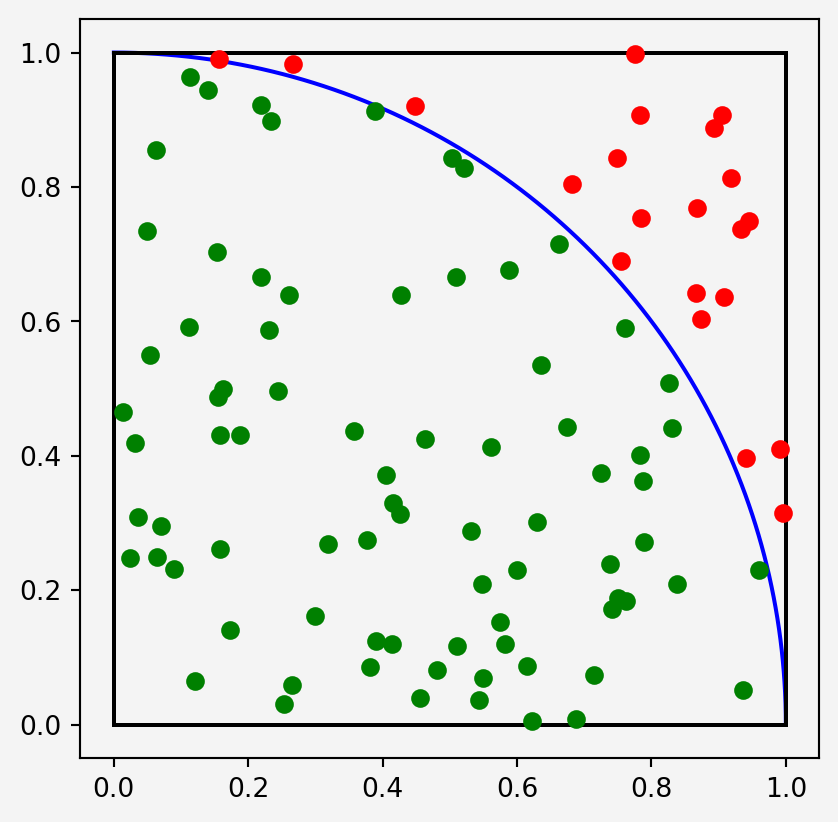

In [5]:
#| code-fold: true
num_points = 100
pts = np.random.rand(num_points,2)

fig, axes = plt.subplots()
theta = np.linspace(0, np.pi/2,100)
x = np.cos(theta)
y = np.sin(theta)

axes.plot(x, y, 'b')
axes.plot([0,1],[0,0],'k')
axes.plot([1,1],[0,1],'k')
axes.plot([1,0],[1,1],'k')
axes.plot([0,0],[1,0],'k')

for p in pts:
    if p[0]**2+p[1]**2 <=1:
        axes.plot(p[0], p[1], 'go')
    else:
        axes.plot(p[0], p[1], 'ro')
axes.set_aspect('equal')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

we get,   


\begin{align*}
\frac{\text{Area of the quarter of a unit circle: C}}{\text{Area of a unit square: S}}&= \frac{\frac{\pi}{4}}{1}=\frac{\pi}{4}\hspace{4mm}\implies \pi = \frac{4C}{S}
\end{align*}  

  

<p style="text-align: justify">
    The above relation tells us some interesting fact. If we uniformly create as many points as possible inside the square then the number of points inside the circle will be approximately 4 times the number of the points outside the circular region.
</p>

In [6]:
#| code-fold: false

def monte_carlo_pi(n):
    inside_circle = 0

    for _ in range(n):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1

    pi_estimate = (inside_circle / n) * 4
    return pi_estimate

# Number of points
n = 10000
print(f"Monte Carlo estimated value of π from {n} points = {monte_carlo_pi(n):.6f}")

Monte Carlo estimated value of π from 10000 points = 3.131200


That's all for this post.  

## Reference  

- [Okten, G. (1999). Contributions to the theory of Monte Carlo and quasi-Monte Carlo methods. Universal-Publishers.](https://www.amazon.com/Contributions-Theory-Monte-Quasi-Monte-Methods/dp/1581120419){target="_blank"}  


**Share on**  

::::{.columns}
:::{.column width="33%"}
<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/statandprob/posts/montecarlo1/" target="_blank" style="color:#1877F2; text-decoration: none;">
 
{{< fa brands facebook size=3x >}}
</a>
 
:::
 
:::{.column width="33%"}
<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/statandprob/posts/montecarlo1/" target="_blank" style="color:#0077B5; text-decoration: none;">
 
{{< fa brands linkedin size=3x >}}
</a>
 
:::
 
:::{.column width="33%"}
<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/statandprob/posts/montecarlo1/" target="_blank" style="color:#1DA1F2; text-decoration: none;">
 
{{< fa brands twitter size=3x >}}
</a>
 
:::
::::
 
<script src="https://giscus.app/client.js"
        data-repo="mrislambd/mrislambd.github.io" 
        data-repo-id="R_kgDOMV8crA"
        data-category="Announcements"
        data-category-id="DIC_kwDOMV8crM4CjbQW"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>
 
<div id="fb-root"></div>
<script async defer crossorigin="anonymous"
 src="https://connect.facebook.net/en_US/sdk.js#xfbml=1&version=v20.0"></script>
<div class="fb-comments" data-href="https://mrislambd.github.io/statandprob/posts/montecarlo1/" data-width="750" data-numposts="5"></div> 

 **You may also like**
